# Speculative Size: Exploring Perception Through Sound Scaling

I recently gave a lecture followed by a video titled [**Zooming in on Sound**](https://youtu.be/9W6Y5vR6KN8?si=WAmFSb5-A1nTnNFF), which presented my efforts in the field of ultrasonic recordings. One of the more interesting discussions that emerged was the perceived size of an object when its sound is slowed down. A particular example that triggered this was a recording of a toothpick dropped on a hard surface. When slowed down 16 times, the sound of the toothpick morphs into something much larger, resembling the sound of a log.

Following a discussion on how slowing down the sound of an object can alter its perceived size, I decided to carry out an analysis. The goal was to compare the sounds of two different-sized wooden cylinders—a **60cm x 3cm beech cylinder** and a **4cm x 2mm** birch cylinder. **By slowing down the smaller piece by a factor of 15**, effectively scaling its size to match the larger piece, **which is 15 times bigger.** I aimed to see if the two objects would produce **similar sounds** when adjusted for size. 

The reason I chose to slow the wood down by a factor of 15 rather than 16 (which corresponds to 4 octaves) is that finding a piece of wood with a diameter of 3.2 cm is not so easy, whereas a 3 cm diameter is much more common. Slowing down by a factor of 15 corresponds to pitching down **47 semitones and +11 cents**.

**[Watch a walkthrough video of the analysis here](https://youtu.be/MTICOHzsU3Q)**

## The Wood

The small cylinder (4cm x 2mm) is crafted from a toothpick, which is made of birch wood. 
The Big cylinder (60cm x 3cm) is crafted from beech wood.
Although I could not match the wood exactly, birch and beech are fairly similar in density, so it should be close enough (Beech: ~710 kg/m³, Birch: ~670 kg/m³)
This small difference in density (about 5-6%) means that while the two types of wood have slightly different physical properties, their acoustic behaviors, especially in terms of resonance frequency, should be fairly close for practical purposes.

![big](https://raw.githubusercontent.com/iftah-og/spec_size/main/ksmall.jpg)


![Small](https://raw.githubusercontent.com/iftah-og/spec_size/main/kbig.jpg)


## Excitation

For the larger piece of wood, I used a **hardwood mallet** to strike the middle. I avoided using excessive force, as this method effectively minimized overtones and emphasized the fundamental frequency, resulting in a cleaner sound with fewer high-frequency resonances.

For the smaller piece, I mounted the birch toothpick-crafted cylinder on a clamp and struck it in the middle with the head of a **sawing pin**. This was more challenging due to the smaller size of the piece, but the localized impact helped excite the fundamental frequency, even though it also introduced more overtones.

## Recording

The recording was made with my **"Sade 19" microphones**, which can capture frequencies up to 90 kHz. It was recorded at 192 kHz / 24 Bit

In [5]:
# Impoting necessary stuff

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from librosa.sequence import dtw

In [6]:
# Audio file Paths, replace wizh your own local path

beech = "/Users/iftah/Desktop/beech_60x3.wav" # 60cm x 3cm Beech Cylinder 
birch_normal = "/Users/iftah/Desktop/birch_4x02_normal.wav" # 4cm x 2mm Birch Cylinder played at normal speed
birch_slow = "/Users/iftah/Desktop/birch_4x02_15slow.wav" # 4cm x 2mm Birch Cylinder played 15 times slower

### Harmonic Content

Let’s look the harmonic content of the two pieces of wood, both played at normal speed. Immediately, we can observe that the smaller piece produces significantly more high frequencies, which is expected.

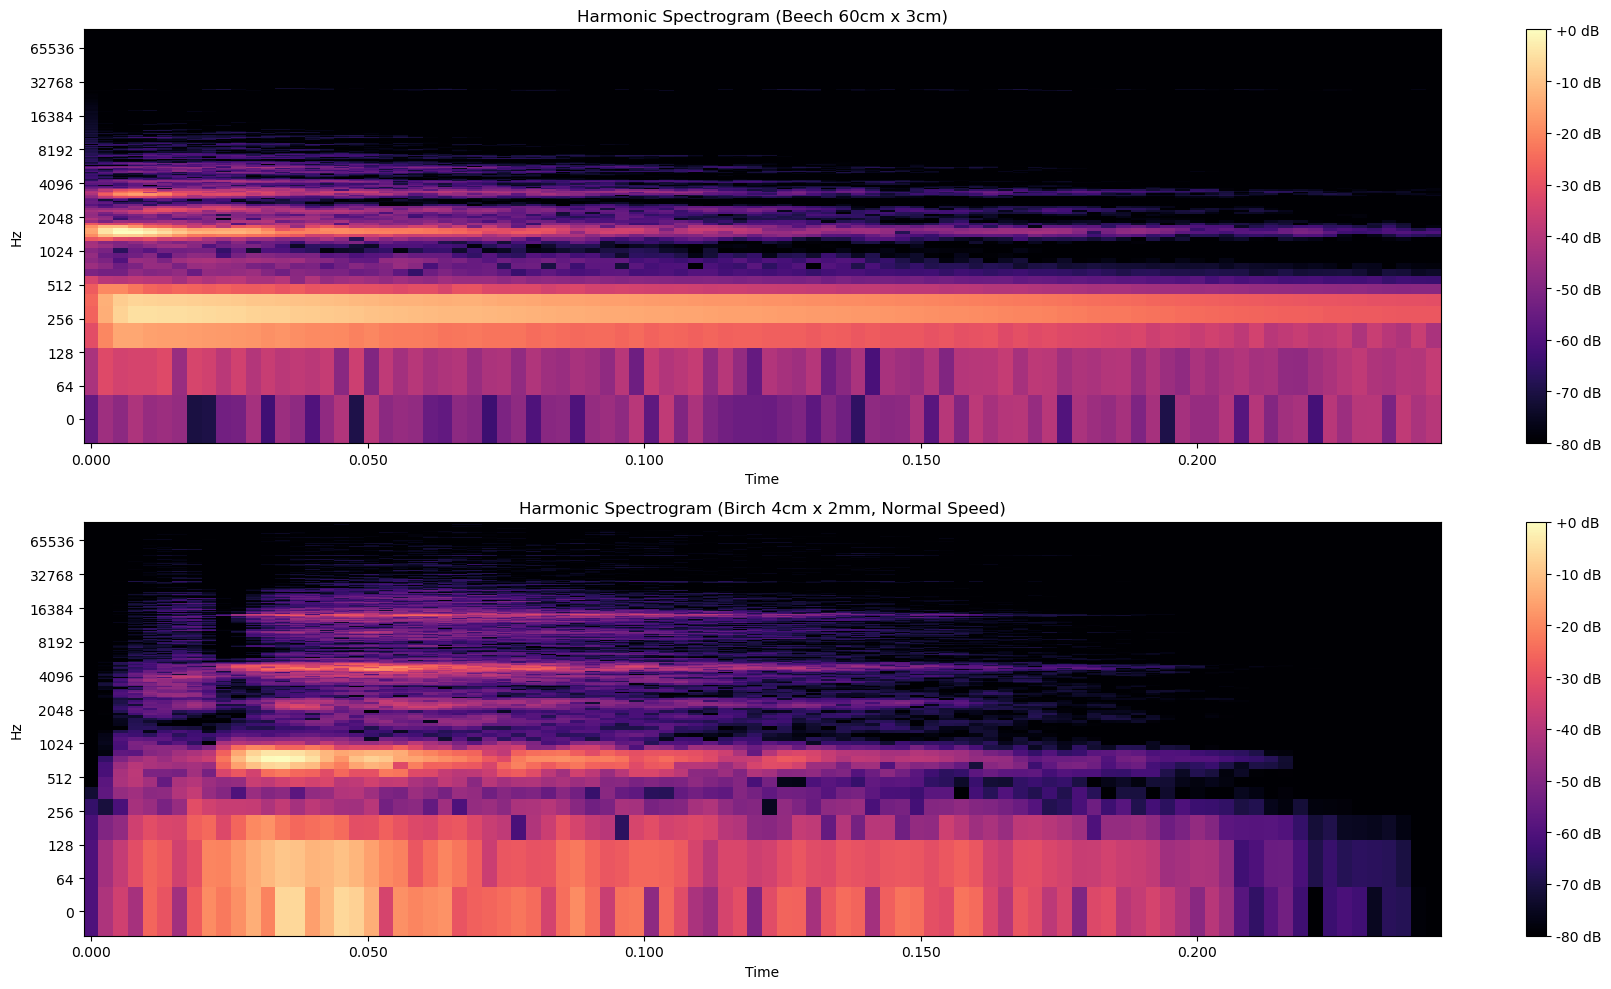

In [7]:
y1, sr1 = librosa.load(beech, sr=None)
y2, sr2 = librosa.load(birch_normal, sr=None)

# Separate and compute the harmonic content
y1_harmonic, _ = librosa.effects.hpss(y1)
y2_harmonic, _ = librosa.effects.hpss(y2)

S1_harmonic = librosa.stft(y1_harmonic, n_fft=2048, hop_length=512)
S2_harmonic = librosa.stft(y2_harmonic, n_fft=2048, hop_length=512)

# Convert to decibels
db1_harmonic = librosa.amplitude_to_db(np.abs(S1_harmonic), ref=np.max)
db2_harmonic = librosa.amplitude_to_db(np.abs(S2_harmonic), ref=np.max)

# Align spectrograms 
min_frames = min(db1_harmonic.shape[1], db2_harmonic.shape[1])
db1_harmonic = db1_harmonic[:, :min_frames]
db2_harmonic = db2_harmonic[:, :min_frames]

# Visualize 
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(db1_harmonic, sr=sr1, hop_length=512, x_axis="time", y_axis="log", cmap="magma")
plt.title("Harmonic Spectrogram (Beech 60cm x 3cm)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(2, 1, 2)
librosa.display.specshow(db2_harmonic, sr=sr2, hop_length=512, x_axis="time", y_axis="log", cmap="magma")
plt.title("Harmonic Spectrogram (Birch 4cm x 2mm, Normal Speed)")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

Now, let’s compare the larger piece of wood with the 15-times slower version of the smaller piece. Even to the naked eye, similarities in the overtone structure are evident.

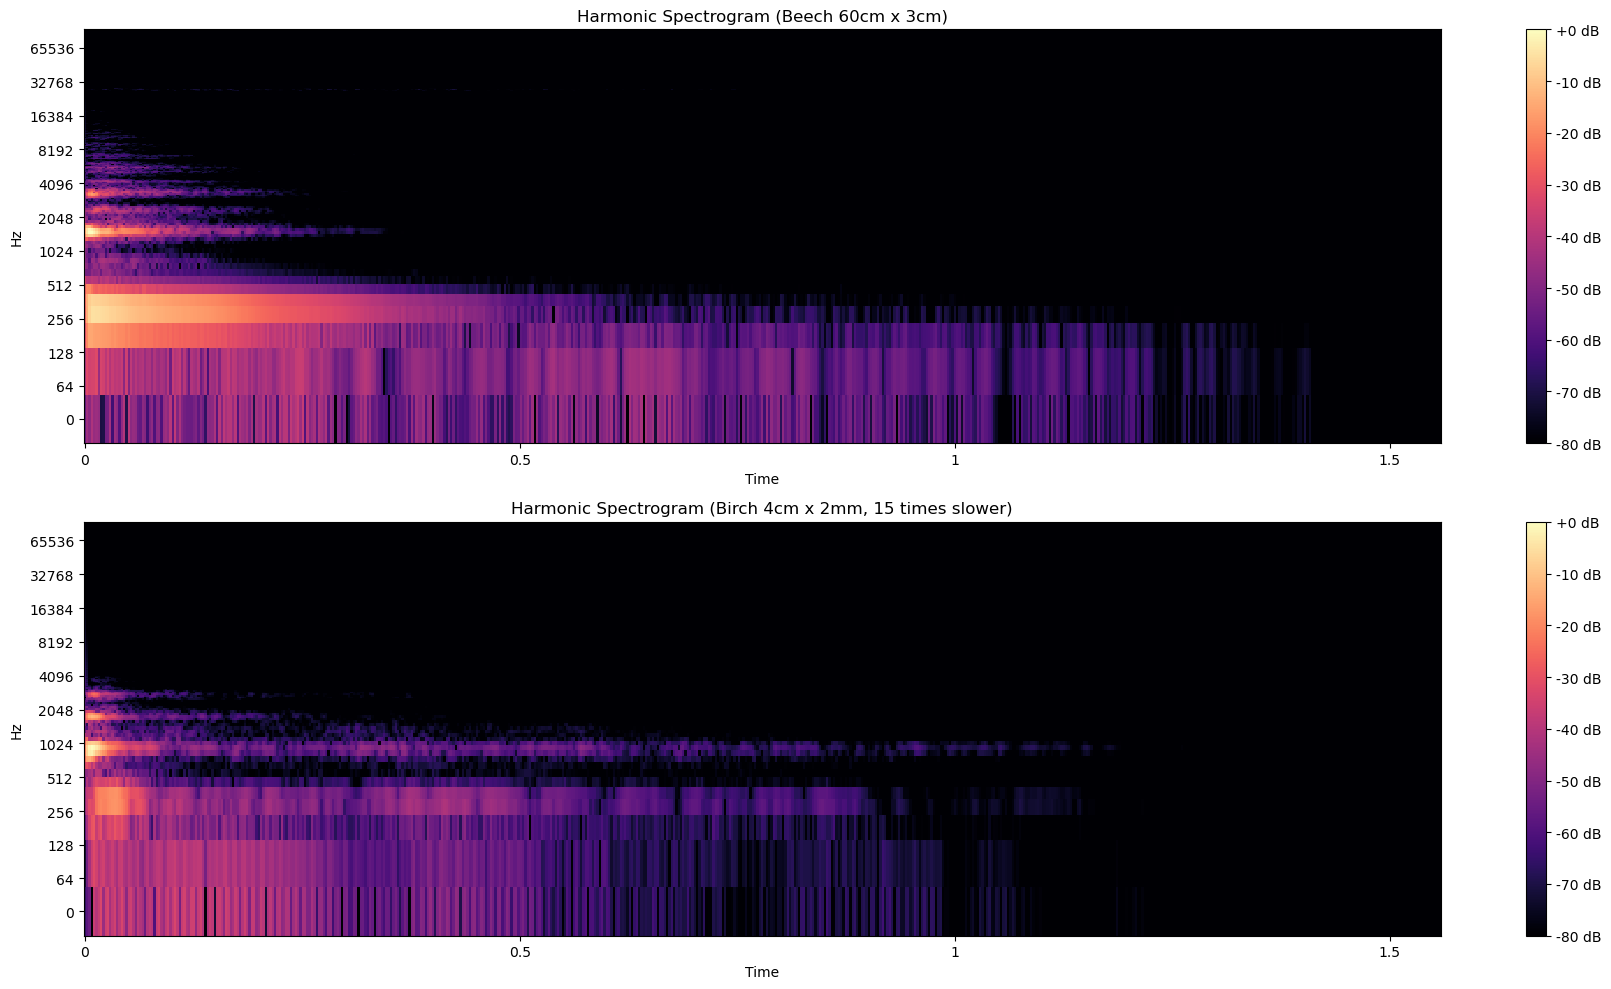

In [8]:
y1, sr1 = librosa.load(beech, sr=None)
y2, sr2 = librosa.load(birch_slow, sr=None)

# Separate and compute the harmonic content
y1_harmonic, _ = librosa.effects.hpss(y1)
y2_harmonic, _ = librosa.effects.hpss(y2)

S1_harmonic = librosa.stft(y1_harmonic, n_fft=2048, hop_length=512)
S2_harmonic = librosa.stft(y2_harmonic, n_fft=2048, hop_length=512)

# Convert to decibels
db1_harmonic = librosa.amplitude_to_db(np.abs(S1_harmonic), ref=np.max)
db2_harmonic = librosa.amplitude_to_db(np.abs(S2_harmonic), ref=np.max)

# Align spectrograms 
min_frames = min(db1_harmonic.shape[1], db2_harmonic.shape[1])
db1_harmonic = db1_harmonic[:, :min_frames]
db2_harmonic = db2_harmonic[:, :min_frames]

# Visualize 
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
librosa.display.specshow(db1_harmonic, sr=sr1, hop_length=512, x_axis="time", y_axis="log", cmap="magma")
plt.title("Harmonic Spectrogram (Beech 60cm x 3cm)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(2, 1, 2)
librosa.display.specshow(db2_harmonic, sr=sr2, hop_length=512, x_axis="time", y_axis="log", cmap="magma")
plt.title("Harmonic Spectrogram (Birch 4cm x 2mm, 15 times slower)")
plt.colorbar(format="%+2.0f dB")

plt.tight_layout()
plt.show()

## Harmonic Difference

Now, lets look at the Harmonic Difference. 

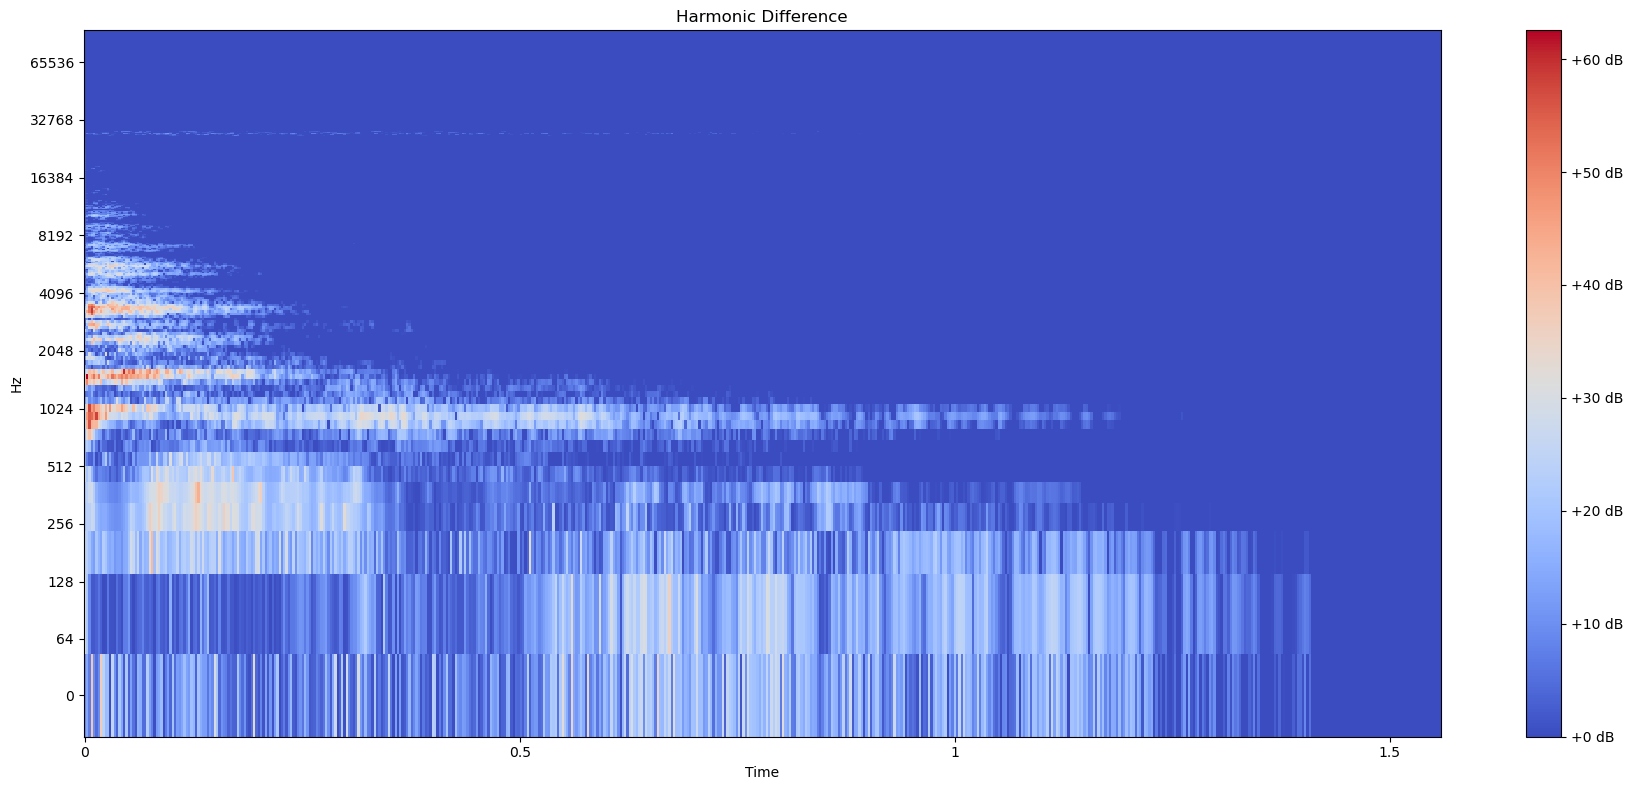

In [9]:
# Compute and visualize the difference in harmonic content
harmonic_diff = np.abs(db1_harmonic - db2_harmonic)

plt.figure(figsize=(18, 8))
librosa.display.specshow(harmonic_diff, sr=sr1, hop_length=512, x_axis="time", y_axis="log", cmap="coolwarm")
plt.title("Harmonic Difference")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

In [10]:
# Harmonic Spectral Difference (MSE)
harmonic_mse = np.mean((db1_harmonic - db2_harmonic) ** 2)

print(f"Harmonic Spectral Difference (MSE): {harmonic_mse}")

Harmonic Spectral Difference (MSE): 4.190314292907715


The Harmonic Spectral Difference (MSE) of 4.19 indicates that the harmonic content of the two audio recordings is **relatively similar**, with some  discrepancies. These differences are likely due to factors such as slight pitch variations, timbral changes, or dynamic features unique to each recording. Given the context of the experiment, where a smaller birch cylinder was struck and slowed down by a factor of 15, the low MSE value supports the hypothesis that, despite differences in size, material, striking position, and exciter, the overall harmonic structure remains quite similar between the two recordings. However, variations in material (beech vs birch), the position where the wood is struck, and the exciter used are also contributing to the differences in the resulting sound.

## Cosine Similarity 

In [11]:
# Cosine Similarity between harmonic spectrograms
cosine_similarity = np.sum(db1_harmonic * db2_harmonic) / (np.sqrt(np.sum(db1_harmonic ** 2)) * np.sqrt(np.sum(db2_harmonic ** 2)))

print(f"Cosine Similarity between harmonic spectrograms: {cosine_similarity}")

Cosine Similarity between harmonic spectrograms: 0.9996713995933533


The Cosine Similarity value of 0.99967 suggests that the harmonic spectrograms of the two audio files are **almost identical**. Cosine similarity looks at the angle between two vectors (in this case, the harmonic spectrograms), and a value this close to 1 means the overall harmonic structure is very similar, even if there are small differences.

##  DTW Distance (Dynamic Time Warping)

Dynamic Time Warping (DTW) is a technique used to assess how two sequences change over time. When applied to harmonic spectrograms, DTW measures how the harmonic content of the two recordings evolves in relation to each other throughout their duration.

The DTW Distance of 14024751.51 indicates how much the harmonic spectrograms of the two audio recordings differ. A smaller DTW distance would mean the recordings are more similar in their harmonic content and timing. The large value here suggests noticeable differences in how the harmonic content evolves over time. This is expected, as the larger beech cylinder produces much more sustain, and the slowed-down recording introduces a much larger room reverb tail, further contributing to the differences between the two sounds.

In [12]:
# DTW
D, wp = dtw(db1_harmonic, db2_harmonic, metric='euclidean')

dtw_distance = np.sum([D[i, j] for i, j in wp])

print(f"DTW Distance between harmonic spectrograms: {dtw_distance}")

DTW Distance between harmonic spectrograms: 14024751.514946852


## Fundamental Frequency Comparision

Finally, let's compare the fundamental frequencies of both recordings and examine the difference. The outcome shows an average difference of 7.36 Hz, which is equivalent to approximately  0.42 semitones, assuming a fundamental frequency around 300 Hz. While the frequencies are not absolutely identical (which is expected), they are very close. This supports the assumption that slowing down (or speeding up) sounds will alter the perceived size in a way that is consistent with physical expectations, but with slight variations due to material properties and other factors.

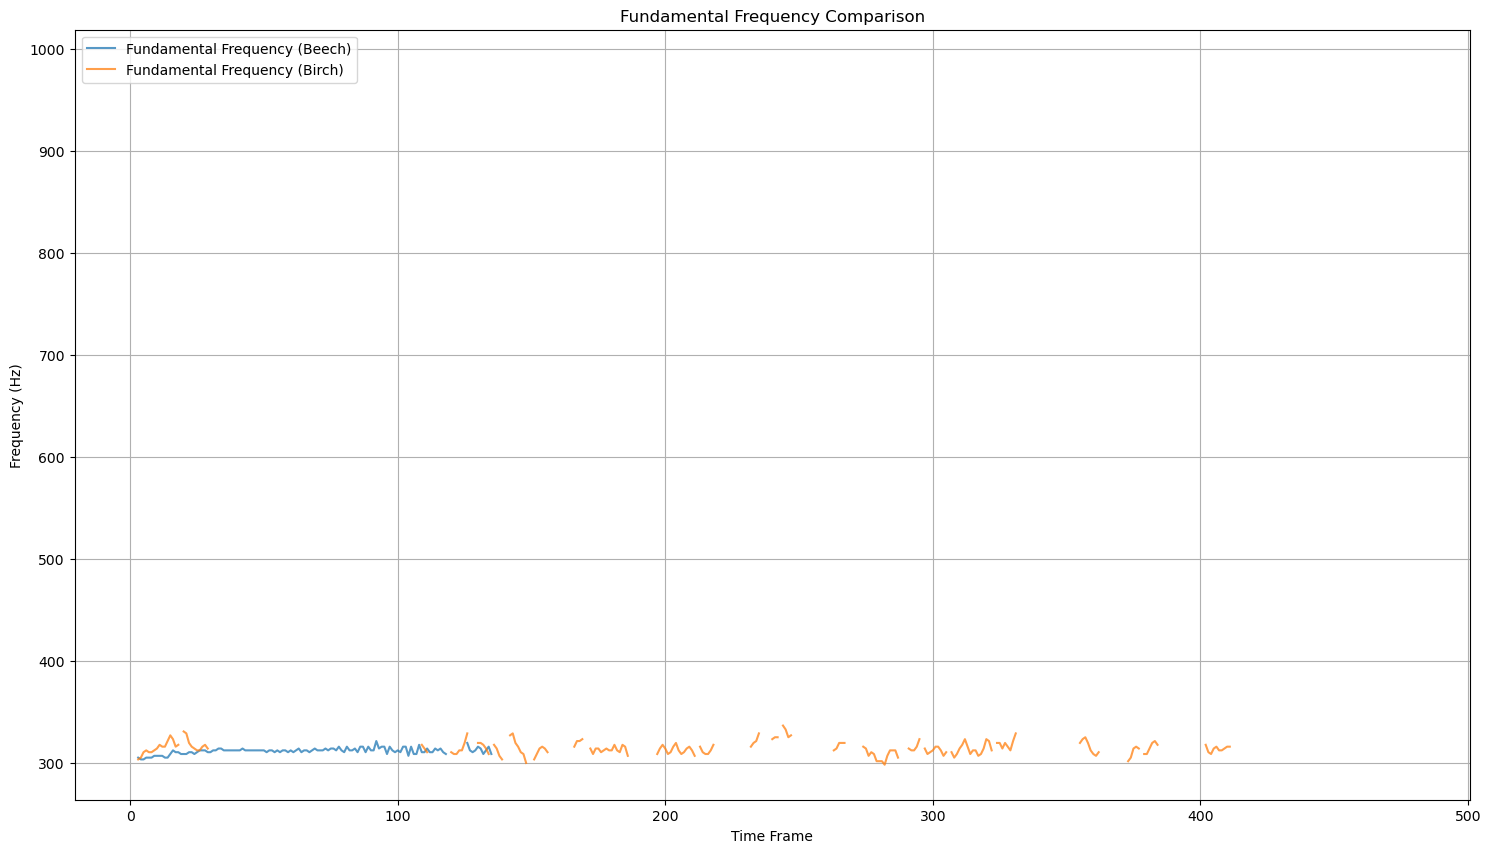

Average Fundamental Frequency Difference: 7.36 Hz


In [14]:
# Fundamental Frequency Extraction
f0_1, voiced_flag_1, voiced_probs_1 = librosa.pyin(y1_harmonic, fmin=50, fmax=1000, sr=sr1)
f0_2, voiced_flag_2, voiced_probs_2 = librosa.pyin(y2_harmonic, fmin=50, fmax=1000, sr=sr2)

# Plot Fundamental Frequencies
plt.figure(figsize=(18, 10))
plt.plot(f0_1, label="Fundamental Frequency (Beech)", alpha=0.75)
plt.plot(f0_2, label="Fundamental Frequency (Birch)", alpha=0.75)
plt.xlabel("Time Frame")
plt.ylabel("Frequency (Hz)")
plt.title("Fundamental Frequency Comparison")
plt.legend()
plt.grid()
plt.show()

# Compute the average fundamental frequency difference
f0_diff = np.nanmean(np.abs(f0_1 - f0_2))

print(f"Average Fundamental Frequency Difference: {f0_diff:.2f} Hz")


## Conclusion


This analysis explores the relationship between the size of an object and its sound, specifically how altering the speed of a recording can simulate changes in the perceived size of the object producing the sound. By slowing down a recording of a smaller object, we observed that the resulting fundamental frequency closely matched that of a larger object with a similar physical structure. This suggests that, under certain conditions, we can predict and speculate on how objects will sound when their size is altered in time (either slowed down or sped up).

While our auditory system perceives pitch changes non-linearly, the results of this experiment highlight how the physical relationship between an object’s size and its emitted sound can be approximated by changing the speed of the recording. This suggests the potential to use techniques such as slowing down or speeding up sounds to simulate and explore the acoustic properties of objects of different sizes, offering new insights into sound design, acoustic modeling, and how physical characteristics might influence the sound of real-world objects.

It is important to note, however, that while the fundamental frequency might scale predictably, the timbre will likely change due to the influence of various factors such as material properties, striking position, and exciter differences. These factors contribute to the harmonic content, sustain, and overall tonal qualities of the sound. Even though the size and fundamental frequency can be approximated, the timbre will shift, especially as the material density and resonant properties of the objects come into play. However, even with these timbral changes, the sound will often still resemble the predictions, especially in terms of the overall character.

In summary, the ability to predict how an object will sound when its speed is altered, based on its physical properties, can be a powerful tool in sound design and acoustic research. This approach provides a way to speculate on the sonic characteristics of objects without having to physically interact with them, offering valuable insights into the relationship between size, material, and sound. While the timbre may evolve due to other factors, the core principles remain valuable for both theoretical exploration and practical applications in acoustic simulations.

## Iftah Gabbai, 2024.

**[Instagram](https://www.instagram.com/iftah.gabbai/)**

**[LinkedIn](https://www.linkedin.com/in/iftah-gabbai-4588a42b6/)**

**[Youtube](https://www.youtube.com/@iftah_fow)**

**[GitHub](https://github.com/iftah-og)**